<a href="https://colab.research.google.com/github/olcaykursun/Algorithms/blob/main/Fall2025/Week3/grades_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

df = pd.read_csv('grades_dataset.csv', index_col=0)
df.head()

,Exams,Assignments,weighted_grade,Letter_Grade
0,74.696608,91.945413,89.37,B
1,82.183521,81.750199,89.26,B
2,77.124352,93.379851,87.94,B
3,74.519743,99.054714,88.32,B
4,69.064466,81.218829,80.84,B


In [ ]:
df.columns

Index(['Exams', 'Assignments', 'weighted_grade', 'Letter_Grade'], dtype='object')

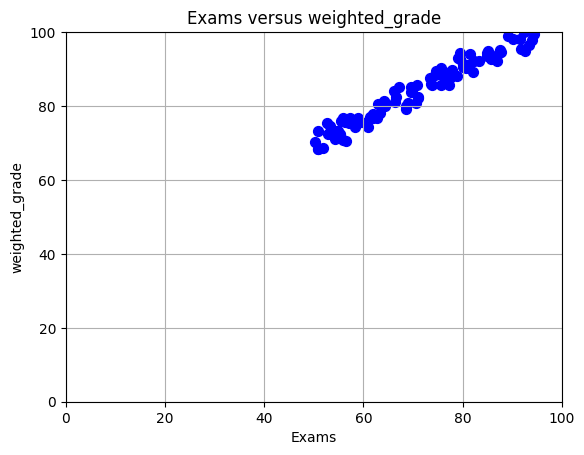

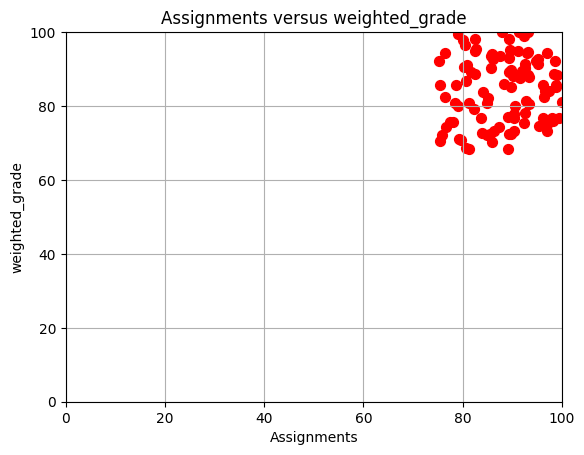

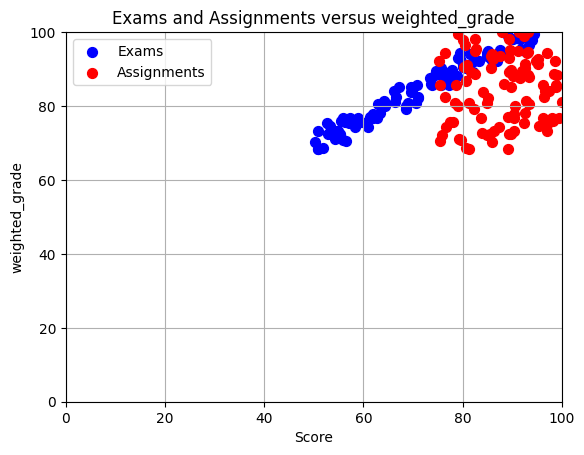

In [ ]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

plt.scatter(df['Exams'], df['weighted_grade'], s=50, c='blue')
plt.title('Exams versus weighted_grade')
plt.xlabel('Exams')
plt.ylabel('weighted_grade')
plt.grid(True)
plt.xlim(0,100)
plt.ylim(0,100)
plt.show()

plt.scatter(df['Assignments'], df['weighted_grade'], s=50, c='red')
plt.title('Assignments versus weighted_grade')
plt.xlabel('Assignments')
plt.ylabel('weighted_grade')
plt.grid(True)
plt.xlim(0,100)
plt.ylim(0,100)
plt.show()

plt.scatter(df['Exams'], df['weighted_grade'], s=50, c='blue', label='Exams')
plt.scatter(df['Assignments'], df['weighted_grade'], s=50, c='red', label='Assignments')
plt.title('Exams and Assignments versus weighted_grade')
plt.xlabel('Score')
plt.ylabel('weighted_grade')
plt.grid(True)
plt.legend()
plt.xlim(0,100)
plt.ylim(0,100)
plt.show()



In [ ]:
# Linear Regression
X = df.drop(columns=['weighted_grade', 'Letter_Grade'])  #features used as input to the predictor
y = df['weighted_grade']

X.columns


Index(['Exams', 'Assignments'], dtype='object')

In [ ]:
df.columns

Index(['Exams', 'Assignments', 'weighted_grade', 'Letter_Grade'], dtype='object')

In [ ]:
reg = LinearRegression()
reg.fit(X, y)
test_dataset = [
                [60, 40],
                [90, 90]
                ]
preds = reg.predict(test_dataset)
preds


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([67.88823661, 97.42084028])

In [ ]:
test_dict = df.from_dict({'Exams':[60, 100, 90], 'Assignments':[50, 100, 0]})
test_dict

,Exams,Assignments
0,60,50
1,100,100
2,90,0


In [ ]:
reg.predict(test_dict)


array([ 69.72005115, 106.04383181,  80.93450943])

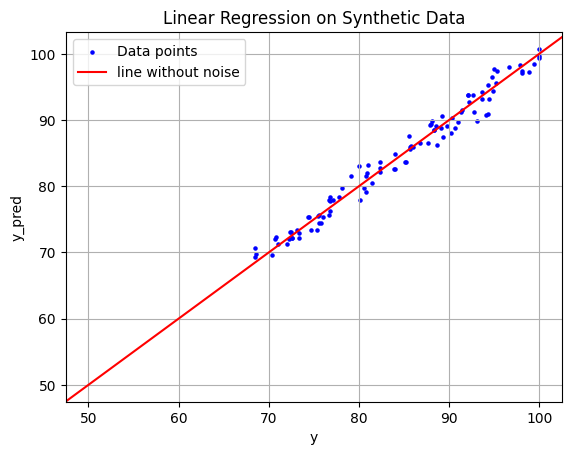

Mean Squared Error: 1.81


In [ ]:
# Plot the expected/true vs predicted/actual outputs
y_pred = reg.predict(X)  #y_hat
plt.scatter(y, y_pred, s=5, c='blue', label='Data points')
plt.axline([50, 50], [100, 100], c='red', label='line without noise')
plt.title('Linear Regression on Synthetic Data')
plt.xlabel('y')
plt.ylabel('y_pred')
plt.grid(True)
plt.legend()
plt.show()

# Calculate MSE
mse = mean_squared_error(y, y_pred)
print(f"Mean Squared Error: {mse:.2f}")


In [ ]:
y - y_pred

,weighted_grade
0,1.985601
1,-1.341321
2,-1.355886
3,-0.246580
4,-0.754601
...,...
95,-0.992867
96,0.356127
97,-0.857738
98,1.333190


In [ ]:
np.max(y_pred)

np.float64(100.7366055012835)

In [ ]:
reg.coef_

array([0.6791177 , 0.18318145])

In [ ]:
reg.intercept_

np.float64(19.8139165001636)

In [ ]:
'''
In a multiple linear regression model, each coefficient
represents the average change in the target variable (y)
for a one-unit change in a corresponding feature,
while keeping all other features constant.
These coefficients act like slopes in a multi-dimensional space.
The intercept, then, serves as a 'baseline' for predictions.
You can think of it as the expected value of the target variable
when all features are at their average values.

By calculating the weighted sum of these averages using the slopes
(coefficients), and then comparing it to the overall average of
the target variable, we can determine this baseline intercept."
'''
Xmeans = X.mean(axis = 0)
weighted_sum_of_Xmeans = np.dot(Xmeans,reg.coef_)
ymean = y.mean()
intercept_estimate = ymean - weighted_sum_of_Xmeans
print(intercept_estimate)

19.8139165001636


In [ ]:
Xmeans

,0
Exams,71.275723
Assignments,88.202044


In [ ]:
ymean - (Xmeans.values[0]*reg.coef_[0] + Xmeans.values[1]*reg.coef_[1])

np.float64(19.8139165001636)